In [1]:
import pandas as pd

# Load dataset (Update filename if necessary)
file_path = r"D:\Project\Intel\assistments_2009_2010.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Display first few rows
print("📌 First 5 rows of the dataset:")
print(df.head())

# Display column names
print("\n📌 Column Names:")
print(df.columns)

# Check for missing values
print("\n📌 Missing Values Summary:")
print(df.isnull().sum())


📌 First 5 rows of the dataset:
   order_id  assignment_id  user_id  assistment_id  problem_id  original  \
0  20224085         232368    73963          42904       76429         0   
1  20224095         232368    73963          42904       76430         0   
2  20224113         232368    73963          42904       76431         0   
3  20224123         232368    73963          42904       76432         0   
4  20224142         232368    73963          42904       76433         0   

   correct  attempt_count  ms_first_response_time tutor_mode answer_type  \
0      0.0              3                106016.0      tutor    choose_1   
1      1.0              1                194187.0      tutor    choose_1   
2      1.0              1                 12734.0      tutor     algebra   
3      1.0              1                333484.0      tutor    choose_1   
4      0.0              2                 52828.0      tutor     algebra   

   sequence_id  student_class_id  position problem_set_

In [2]:
# Drop unnecessary columns
columns_to_drop = ['order_id', 'assignment_id', 'teacher_id', 'school_id', 
                   'sequence_id', 'student_class_id', 'position', 'problem_set_type', 'base_sequence_id']
df_cleaned = df.drop(columns=columns_to_drop)

# Fill missing values
df_cleaned['list_skill_ids'].fillna("Unknown", inplace=True)
df_cleaned['list_skills'].fillna("Unknown", inplace=True)
df_cleaned['ms_first_response_time'].fillna(df_cleaned['ms_first_response_time'].median(), inplace=True)

# Drop rows where essential columns are missing
df_cleaned.dropna(subset=['problem_id', 'correct'], inplace=True)

# Display cleaned dataset info
print("📌 Cleaned Dataset Info:")
print(df_cleaned.info())

# Display first 5 rows of cleaned data
print("\n📌 First 5 rows of cleaned dataset:")
print(df_cleaned.head())


C:\Users\Shiv Rastogi\AppData\Local\Temp\ipykernel_9828\3201737172.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['list_skill_ids'].fillna("Unknown", inplace=True)
C:\Users\Shiv Rastogi\AppData\Local\Temp\ipykernel_9828\3201737172.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

📌 Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011079 entries, 0 to 1011078
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   user_id                 1011079 non-null  int64  
 1   assistment_id           1011079 non-null  int64  
 2   problem_id              1011079 non-null  int64  
 3   original                1011079 non-null  int64  
 4   correct                 1011079 non-null  float64
 5   attempt_count           1011079 non-null  int64  
 6   ms_first_response_time  1011079 non-null  float64
 7   tutor_mode              1011079 non-null  object 
 8   answer_type             1011079 non-null  object 
 9   list_skill_ids          1011079 non-null  object 
 10  list_skills             1011079 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 84.9+ MB
None

📌 First 5 rows of cleaned dataset:
   user_id  assistment_id  problem_id  origi

In [3]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# One-Hot Encode 'answer_type' and 'tutor_mode'
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df_cleaned[['answer_type', 'tutor_mode']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Normalize 'ms_first_response_time'
scaler = MinMaxScaler()
df_cleaned['ms_first_response_time'] = scaler.fit_transform(df_cleaned[['ms_first_response_time']])

# Drop original categorical columns and merge new encoded features
df_preprocessed = df_cleaned.drop(columns=['answer_type', 'tutor_mode'])
df_preprocessed = pd.concat([df_preprocessed, encoded_df], axis=1)

# Display processed dataset info
print("📌 Preprocessed Dataset Info:")
print(df_preprocessed.info())

# Display first 5 rows of preprocessed data
print("\n📌 First 5 rows of preprocessed dataset:")
print(df_preprocessed.head())


📌 Preprocessed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011079 entries, 0 to 1011078
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   user_id                    1011079 non-null  int64  
 1   assistment_id              1011079 non-null  int64  
 2   problem_id                 1011079 non-null  int64  
 3   original                   1011079 non-null  int64  
 4   correct                    1011079 non-null  float64
 5   attempt_count              1011079 non-null  int64  
 6   ms_first_response_time     1011079 non-null  float64
 7   list_skill_ids             1011079 non-null  object 
 8   list_skills                1011079 non-null  object 
 9   answer_type_choose_1       1011079 non-null  float64
 10  answer_type_choose_n       1011079 non-null  float64
 11  answer_type_external       1011079 non-null  float64
 12  answer_type_fill_in_1      1011079 non-nu

In [4]:
from sklearn.model_selection import train_test_split

# Select features (excluding categorical text columns)
features = df_preprocessed.drop(columns=['correct', 'list_skill_ids', 'list_skills'])
target = df_preprocessed['correct']

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display dataset shapes
print("📌 Training Set Shape:", X_train.shape, y_train.shape)
print("📌 Testing Set Shape:", X_test.shape, y_test.shape)


📌 Training Set Shape: (808863, 16) (808863,)
📌 Testing Set Shape: (202216, 16) (202216,)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the fixed LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output probability of correct answer (0 or 1)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Display model summary
print("📌 Fixed Model Summary:")
model.summary()



c:\Users\Shiv Rastogi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


📌 Fixed Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 16, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import numpy as np

# Reshape input data for LSTM: (samples, time steps, features)
X_train_reshaped = np.expand_dims(X_train, axis=-1)  # Add extra dimension
X_test_reshaped = np.expand_dims(X_test, axis=-1)    # For evaluation

# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    epochs=10,  # Train for 10 epochs (adjustable)
    batch_size=64,  # Optimal batch size for performance
    verbose=1
)

# Display training history
print("📌 Model Training Complete.")


Epoch 1/10
12639/12639 ━━━━━━━━━━━━━━━━━━━━ 360s 28ms/step - accuracy: 0.7176 - loss: 0.5582 - val_accuracy: 0.8038 - val_loss: 0.4453
Epoch 2/10
12639/12639 ━━━━━━━━━━━━━━━━━━━━ 246s 19ms/step - accuracy: 0.7621 - loss: 0.4893 - val_accuracy: 0.8047 - val_loss: 0.4290
Epoch 3/10
12639/12639 ━━━━━━━━━━━━━━━━━━━━ 239s 19ms/step - accuracy: 0.8044 - loss: 0.4331 - val_accuracy: 0.8055 - val_loss: 0.4271
Epoch 4/10
12639/12639 ━━━━━━━━━━━━━━━━━━━━ 241s 19ms/step - accuracy: 0.8041 - loss: 0.4322 - val_accuracy: 0.8053 - val_loss: 0.4271
Epoch 5/10
12639/12639 ━━━━━━━━━━━━━━━━━━━━ 245s 19ms/step - accuracy: 0.7864 - loss: 0.4692 - val_accuracy: 0.8060 - val_loss: 0.4268
Epoch 6/10
12639/12639 ━━━━━━━━━━━━━━━━━━━━ 256s 20ms/step - accuracy: 0.8063 - loss: 0.4272 - val_accuracy: 0.8061 - val_loss: 0.4266
Epoch 7/10
12639/12639 ━━━━━━━━━━━━━━━━━━━━ 353s 28ms/step - accuracy: 0.8074 - loss: 0.4257 - val_accuracy: 0.8061 - val_loss: 0.4263
Epoch 8/10
12639/12639 ━━━━━━━━━━━━━━━━━━━━ 251s 20ms/s

In [8]:
import matplotlib.pyplot as plt

# Save the trained model
model.save("knowledge_tracing_lstm.h5")
print("📌 Model Saved Successfully!")





📌 Model Saved Successfully!


In [9]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"📌 Test Accuracy: {test_accuracy:.4f}")
print(f"📌 Test Loss: {test_loss:.4f}")

6320/6320 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.8051 - loss: 0.4275
📌 Test Accuracy: 0.8060
📌 Test Loss: 0.4265


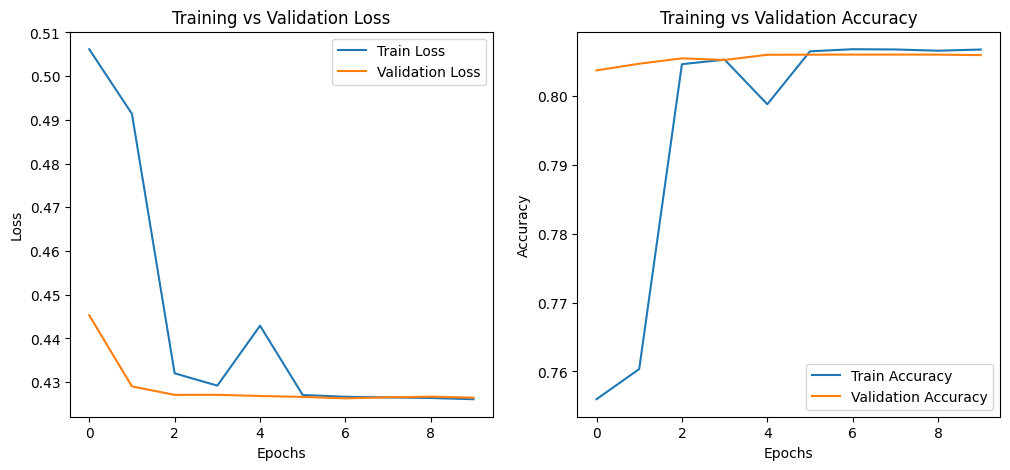

In [10]:
# Plot training history (loss & accuracy)
plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.show()


In [13]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare dataset for collaborative filtering
reader = Reader(rating_scale=(0, 1))  # Correct answers are either 0 or 1
data = Dataset.load_from_df(df_preprocessed[['user_id', 'problem_id', 'correct']], reader)

# Split into train-test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD model
svd_model = SVD(n_factors=50, random_state=42)
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

# Evaluate model accuracy (RMSE - Root Mean Square Error)
rmse = accuracy.rmse(predictions)
print(f"📌 Model RMSE: {rmse:.4f}")

# Save the trained model
import pickle
with open("adaptive_question_recommendation_svd.pkl", "wb") as f:
    pickle.dump(svd_model, f)

print("📌 Adaptive Question Recommendation Model Saved Successfully!")


RMSE: 0.4090
📌 Model RMSE: 0.4090
📌 Adaptive Question Recommendation Model Saved Successfully!


In [12]:
pip install surprise

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-win_amd64.whl size=1277472 sha256=a3d36bc44a766df1cabef3637d6c175a82ca0a7ef3dbf989317972b9fd23da9e
  Stored in directory: c:\users\shiv rastogi\appdata\local\pip\cache\wheels\4b\3f\df\6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Shiv Rastogi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
import numpy as np
import random

# Define Q-learning parameters
num_questions = df_preprocessed['problem_id'].nunique()  # Total unique questions
num_students = df_preprocessed['user_id'].nunique()  # Total unique students
Q_table = np.zeros((num_students, num_questions))  # Initialize Q-table

alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation tradeoff

# Train Q-Learning agent
for index, row in df_preprocessed.iterrows():
    student = int(row['user_id']) % num_students
    question = int(row['problem_id']) % num_questions
    reward = 1 if row['correct'] == 1 else -1  # Reward system
    
    # Choose action (question) using epsilon-greedy strategy
    if random.uniform(0, 1) < epsilon:
        next_question = random.randint(0, num_questions - 1)  # Explore
    else:
        next_question = np.argmax(Q_table[student, :])  # Exploit best-known action
    
    # Update Q-table using the Bellman equation
    Q_table[student, question] = Q_table[student, question] + alpha * (
        reward + gamma * np.max(Q_table[student, :]) - Q_table[student, question]
    )

print("📌 Q-Learning Training Completed!")

# Save Q-table for future use
np.save("q_learning_difficulty_adjustment.npy", Q_table)
print("📌 Q-Table Saved Successfully!")


📌 Q-Learning Training Completed!
📌 Q-Table Saved Successfully!


In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Select features for performance prediction
features = ['attempt_count', 'ms_first_response_time', 'answer_type_choose_1',
            'answer_type_choose_n', 'answer_type_external', 'answer_type_fill_in_1',
            'answer_type_open_response', 'answer_type_rank', 'tutor_mode_pre',
            'tutor_mode_survey', 'tutor_mode_test', 'tutor_mode_tutor']

X_train_perf = X_train[features]
X_test_perf = X_test[features]
y_train_perf = y_train
y_test_perf = y_test

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train_perf, y_train_perf)

# Make predictions
y_pred = xgb_model.predict(X_test_perf)

# Compute RMSE manually (no 'squared' argument issue)
rmse = mean_squared_error(y_test_perf, y_pred) ** 0.5
print(f"📌 Student Performance Prediction Model RMSE: {rmse:.4f}")

# Save the trained model
xgb_model.save_model("student_performance_prediction_xgb.json")
print("📌 Student Performance Prediction Model Saved Successfully!")


📌 Student Performance Prediction Model RMSE: 0.3580
📌 Student Performance Prediction Model Saved Successfully!


In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Shiv Rastogi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [27]:
print("Q_table shape:", Q_table.shape)


Q_table shape: (8519, 35978)


In [28]:
valid_user_ids = list(range(Q_table.shape[0]))  # List of valid user IDs
print("Valid user_id range:", valid_user_ids[:10], "... to", valid_user_ids[-10:])  # Print some sample IDs


Valid user_id range: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ... to [8509, 8510, 8511, 8512, 8513, 8514, 8515, 8516, 8517, 8518]


In [29]:
print("XGBoost Model Loaded:", student_performance_model)


XGBoost Model Loaded: XGBRegressor(base_score='6.289977E-1', booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             feature_types=['int', 'float', 'float', 'float', 'float', 'float',
                            'float', 'float', 'float', 'float', 'float',
                            'float'],
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [32]:
print("Model Expected Features:", student_performance_model.feature_names_in_)


Model Expected Features: ['attempt_count' 'ms_first_response_time' 'answer_type_choose_1'
 'answer_type_choose_n' 'answer_type_external' 'answer_type_fill_in_1'
 'answer_type_open_response' 'answer_type_rank' 'tutor_mode_pre'
 'tutor_mode_survey' 'tutor_mode_test' 'tutor_mode_tutor']


In [33]:
# Example input with placeholder values for missing features
test_input = np.array([[3, 2000, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])  # 12 features

# Ensure correct shape
print("✅ Reshaped Input:", test_input.shape)

# Make prediction
prediction = student_performance_model.predict(test_input)
print("📌 Test Prediction Output:", prediction)


✅ Reshaped Input: (1, 12)
📌 Test Prediction Output: [0.03784478]


In [34]:
print("✅ Model Loaded Successfully")
print("📌 Expected Features:", student_performance_model.feature_names_in_)
print("📌 Model Params:", student_performance_model.get_params())


✅ Model Loaded Successfully
📌 Expected Features: ['attempt_count' 'ms_first_response_time' 'answer_type_choose_1'
 'answer_type_choose_n' 'answer_type_external' 'answer_type_fill_in_1'
 'answer_type_open_response' 'answer_type_rank' 'tutor_mode_pre'
 'tutor_mode_survey' 'tutor_mode_test' 'tutor_mode_tutor']
📌 Model Params: {'objective': 'reg:squarederror', 'base_score': '6.289977E-1', 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': ['int', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float'], 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': Non